# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch.nn as nn
import os
import gym
import torch
import torch.nn.functional as F
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name="Tennis.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print(states)
print('state type')
print(type(states))
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the second agent looks like:', states[1])


Number of agents: 2
Size of each action: 2
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.        ]]
state type
<class 'numpy.ndarray'>
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The

Episode 100	Average Score: -0.00
Episode 200	Average Score: -0.00
Episode 300	Average Score: 0.00
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.02
Episode 600	Average Score: 0.04
Episode 700	Average Score: 0.04
Episode 800	Average Score: 0.03
Episode 900	Average Score: 0.03
Episode 1000	Average Score: 0.03
Episode 1100	Average Score: 0.03
Episode 1200	Average Score: 0.05
Episode 1300	Average Score: 0.08
Episode 1400	Average Score: 0.07
Episode 1500	Average Score: 0.08
Episode 1600	Average Score: 0.09
Episode 1700	Average Score: 0.07
Episode 1800	Average Score: 0.06
Episode 1900	Average Score: 0.06
Episode 2000	Average Score: 0.09
Episode 2100	Average Score: 0.07
Episode 2200	Average Score: 0.15
Episode 2300	Average Score: 0.15
Episode 2400	Average Score: 0.14
Episode 2500	Average Score: 0.19
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
succedd
Episode 2600	Average Score: 0.57
succedd
succedd
succe

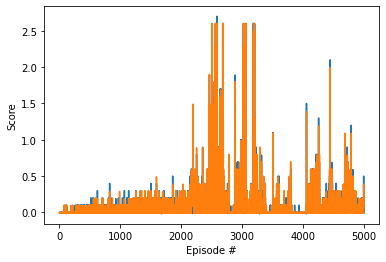

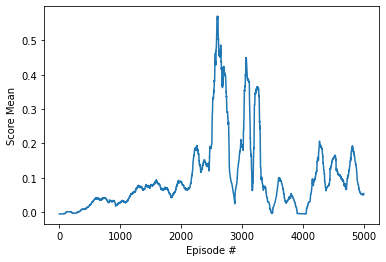

In [4]:
agent = Agent(state_size=24*2, action_size=2, random_seed=2)

def ddpg(n_episodes=5000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    scores_mean = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros((1,2))
        nr_step = 1
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]        #  send the action to the environment
            next_state = env_info.vector_observations   #  get the next state
            reward = env_info.rewards                  #  get the reward
            done = env_info.local_done                  #  see if episode has finished
            nr_step = nr_step+1
            #if nr_step%10==0:
            agent.step(state, action, reward, next_state, done,learn_enable=True)
            #else:
            #    agent.step(state, action, reward, next_state, done,learn_enable=False)
            state = next_state
            #print(reward)
            score += reward
            if np.any(done):                                  # exit loop if episode finished
                break
                
        scores_deque.append(max(score))
        scores.append(max(score))
        scores_mean.append(np.mean(scores_deque))
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        #print('\rEpisode {}\tAverage Score real : {:.2f}'.format(i_episode, score), end="")
       
        if i_episode>100 and np.mean(scores_deque)>0.5:
            print('succedd')
            #break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores,scores_mean

scores,scores_mean= ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_mean)+1), scores_mean)
plt.ylabel('Score Mean')
plt.xlabel('Episode #')
plt.show()
env.close()